시계열은 금융, 경제, 생태학, 신경 과학, 물리학 등 여러 다양한 분야에서 사용돼ㅣ는 매우 중요한 구조화된 데이터이다.

In [1]:
import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 11.1 날짜, 시간 자료형과 도구

datetime은 날짜와 시간을 모두 저장하며 마이크로초까지 지원한다.

In [2]:
from datetime import datetime

now = datetime.now()
now

now.year, now.month, now.day

datetime.datetime(2023, 12, 13, 9, 13, 54, 812369)

(2023, 12, 13)

datetime.timedelta는 두 datetime 객체 간의 시간적 차이를 표현한다. (간단하게 timedelta로 표현)

In [3]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

delta.days
delta.seconds

datetime.timedelta(days=926, seconds=56700)

926

56700

timedelta를 더하거나 빼면 그만큼의 시간이 datetime 객체에 적용되어 새로운 객체가 만들어진다.

In [4]:
from datetime import timedelta
start = datetime(2011, 1, 7)

start + timedelta(12)
start - 2 * timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

datetime.datetime(2010, 12, 14, 0, 0)

### datetime 모듈의 자료형
- `date` : 그레고리력을 사용해서 날짜(연, 월, 일)를 저장
- `time` : 하루의 시간을 시, 분, 초, 마이크로초 단위로 저장
- `datetime` : 날짜와 시간을 저장
- `timedelta` : 두 datetime 값 간의 차이(일, 초, 마이크로초)를 표현
- `tzinfo` : 표준 시간대를 저장하기 위한 기본 자료형

## 11.1.1 문자열을 datetime으로 변환하기

datetime 객체와 Timestamp 객체는 str이나 strftime 메서드에 포맷(형식) 규칙을 넘겨서 문자열로 나타낼 수 있다.

In [5]:
stamp = datetime(2011, 1, 3)
str(stamp)
stamp.strftime("%Y-%m-%d")

'2011-01-03 00:00:00'

'2011-01-03'

### datetime 포맷 규칙 (ISO C89 호환)
- `%Y` : 연도(4자리)
- `%y` : 연도(2자리)
- `%m` : 월(2자리)[01, 12]
- `%d` : 일(2자리)[01, 31]
- `%H` : 시간(24시간 형식)[00, 23]
- `%I` : 시간(12시간 형식)[01, 12]
- `%M` : 분(2자리)[00, 59]
- `%S` : 초[00, 61] (60, 61은 윤초)
- `%f` : 0으로 채운 정수로 표현된 마이크로초(000000~999999)
- `%j` : 0으로 채운 정수로 표현된 연중 날짜(001~366)
- `%w` : 정수로 나타낸 요일 [0(일요일), 6]
- `%u` : 1부터 시작하는 정수로 나타낸 요일 (1은 월요일)
- `%U` :
- `%W` :
- `%z` :
- `%Z` :
- `%F` :
- `%D` :

포맷 코드는 datetime.strptime으로 문자열을 날짜로 변환할 때 사용한다. (%F와 같은 일부 코드는 사용 불가능)

`datetime.strptime`은 알려진 포맷을 날짜를 파싱하는 하나의 방법이다.

In [6]:
value = "2011-01-03"
datetime.strptime(value, "%Y-%m-%d")

datestrs = ["7/6/2011", "8/6/2011"]
[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]

datetime.datetime(2011, 1, 3, 0, 0)

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

`pandas.to_datetime` 메서드는 여러 종류의 날짜 표현을 처리하고 ISO 8601 같은 표준 날짜 포맷을 매우 빠르게 처리할 수 있다.

In [7]:
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

누락된 값(None, 빈 문자열 등)으로 간주되어야 할 값도 처리한다.

In [8]:
idx = pd.to_datetime(datestrs + [None])
idx
idx[2]
pd.isna(idx)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

NaT

array([False, False,  True])

### 로케일별 날짜 포맷
- `%a` : 축약된 요일 이름
- `%A` : 요일 이름
- `%b` : 축약된 월 이름
- `%B` : 월 이름
- `%c` : 전체 날짜와 시간 (Tue 01 May 2012 04:20:57 PM)
- `%p` : 해당 로케일에서 AM, PM에 대응되는 이름 (AM 오전, PM 오후)
- `%x` : 로케일에 맞는 날짜 형식 (미국 2012년 5월 1일을 05/01/2012)
- `%X` : 로케일에 맞는 시간 형식 (04:24:12 PM)

# 11.2 시계열 기초

판다스에서 찾아볼 수 있는 가장 기본적인 시계열의 종류는 파이썬 문자열이나 datetime 객체로 표현되는 타임스탬프로 색인된 Series 객체이다.

In [9]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.standard_normal(6), index=dates)
ts

2011-01-02    1.221384
2011-01-05    0.764230
2011-01-07   -0.462754
2011-01-08    0.819502
2011-01-10   -0.135479
2011-01-12   -0.387422
dtype: float64

내부적으로 살펴보면 DatetimeIndex에 datetime 객체가 들어있다.

In [10]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

서로 다르게 색인된 시계열 객체 간의 산술 연산은 자동으로 날짜에 맞춰진다.

In [11]:
ts + ts[::2]

2011-01-02    2.442768
2011-01-05         NaN
2011-01-07   -0.925508
2011-01-08         NaN
2011-01-10   -0.270958
2011-01-12         NaN
dtype: float64

In [12]:
ts.index.dtype

dtype('<M8[ns]')

In [13]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

## 11.2.1 색인, 선택, 부분 선택

시계열은 레이블에 기반해 데이터를 선택하고, 인덱싱할 때 pandas.Series와 동일하게 작동한다.

In [14]:
stamp = ts.index[2]
ts[stamp]
ts["2011-01-10"]

-0.4627537768125431

-0.13547906898580814

긴 시계열에서는 연을 넘기거나 연, 월만 넘겨서 데이터의 일부 구간만 선택할 수도 있다.

In [15]:
longer_ts = pd.Series(np.random.standard_normal(1000),
                      index=pd.date_range("2000-01-01", periods=1000))
longer_ts
print("# 연도")
longer_ts["2001"]
print("# 연, 월")
longer_ts["2001-05"]

2000-01-01   -0.343717
2000-01-02    0.504576
2000-01-03    1.155405
2000-01-04    1.898606
2000-01-05    0.411151
                ...   
2002-09-22    1.180659
2002-09-23   -0.551408
2002-09-24    0.971911
2002-09-25    0.090999
2002-09-26    0.986399
Freq: D, Length: 1000, dtype: float64

# 연도


2001-01-01   -0.557020
2001-01-02    0.550164
2001-01-03   -1.713711
2001-01-04   -0.708871
2001-01-05   -0.872593
                ...   
2001-12-27   -2.122660
2001-12-28    0.468999
2001-12-29    1.812032
2001-12-30    0.571907
2001-12-31   -0.493088
Freq: D, Length: 365, dtype: float64

# 연, 월


2001-05-01    0.362165
2001-05-02    0.835129
2001-05-03    0.811790
2001-05-04   -0.019058
2001-05-05    0.537369
2001-05-06    2.431224
2001-05-07   -0.746706
2001-05-08   -1.748728
2001-05-09   -0.292136
2001-05-10    0.973392
2001-05-11    0.608687
2001-05-12   -1.127728
2001-05-13    0.609748
2001-05-14   -0.999527
2001-05-15    0.489439
2001-05-16   -0.121228
2001-05-17    0.116557
2001-05-18    1.435349
2001-05-19    1.332289
2001-05-20    0.505349
2001-05-21    0.637178
2001-05-22    0.355867
2001-05-23    1.542221
2001-05-24    0.531624
2001-05-25    1.012640
2001-05-26    0.233120
2001-05-27   -0.100072
2001-05-28    0.421383
2001-05-29    1.216713
2001-05-30   -0.608644
2001-05-31   -0.188906
Freq: D, dtype: float64

날짜로 데이터를 잘래내는 것도 가능하다.

In [16]:
ts[datetime(2011, 1, 7):]

ts[datetime(2011, 1, 7):datetime(2011, 1, 10)]

2011-01-07   -0.462754
2011-01-08    0.819502
2011-01-10   -0.135479
2011-01-12   -0.387422
dtype: float64

2011-01-07   -0.462754
2011-01-08    0.819502
2011-01-10   -0.135479
dtype: float64

대부분의 시계열 데이터는 연대순으로 정렬되기 때문에 범위를 지정하려면 시계열에 기재하지 않고 타임스탬프를 이용해서 Series를 나눈다.

In [17]:
ts
ts["2011-01-06":"2011-01-11"]

2011-01-02    1.221384
2011-01-05    0.764230
2011-01-07   -0.462754
2011-01-08    0.819502
2011-01-10   -0.135479
2011-01-12   -0.387422
dtype: float64

2011-01-07   -0.462754
2011-01-08    0.819502
2011-01-10   -0.135479
dtype: float64

In [18]:
ts.truncate(after="2011-01-09")

2011-01-02    1.221384
2011-01-05    0.764230
2011-01-07   -0.462754
2011-01-08    0.819502
dtype: float64

In [19]:
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED")
long_df = pd.DataFrame(np.random.standard_normal((100, 4)),
                       index=dates, columns=["Colorado", "Texas", "New York", "Ohio"])
long_df.loc["2001-05"]

,Colorado,Texas,New York,Ohio
2001-05-02,-0.308188,-1.903429,-0.514310,0.116509
2001-05-09,1.997738,0.999231,0.126156,-2.348334
2001-05-16,0.114747,0.973071,0.416081,-0.521002
2001-05-23,1.187014,-0.686343,0.222284,0.111977
2001-05-30,-1.067110,-1.686905,-0.059063,1.523085


## 11.2.2 중복된 색인을 갖는 시계열

In [20]:
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02", "2000-01-02", "2000-01-03"])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

`is_unique` 속성으로 데이터를 확인해보면 색인이 유일한지 여부를 알 수 있다.

In [21]:
dup_ts.index.is_unique

False

시계열 데이터를 인덱싱하면 타임스탬프의 중복 여부에 따라 스칼라 값이나 슬라이스가 생성된다.

In [22]:
print("# 중복 없음")
dup_ts["2000-01-03"]

print("# 중복 있음")
dup_ts["2000-01-02"]

# 중복 없음


4

# 중복 있음


2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

groupby에 level=0(단일 단계 인덱싱)을 넘겨서 유일하지 않는 타임스탬프를 갖는 데이터를 집계할 수 있다.

In [23]:
grouped = dup_ts.groupby(level=0)
grouped.mean()
grouped.count()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 11.3 날짜 범위, 빈도, 이동

고정된 일간 빈도로 변환하려면 `resample` 메서드를 사용한다.

In [24]:
ts
resampler = ts.resample("D")    # 문자열 "D"는 일간 빈도
resampler

2011-01-02    1.221384
2011-01-05    0.764230
2011-01-07   -0.462754
2011-01-08    0.819502
2011-01-10   -0.135479
2011-01-12   -0.387422
dtype: float64

## 11.3.1 날짜 범위 생성하기

`pandas.date_range`를 사용하면 특정 빈도에 따라 지정된 길이만큼의 DatetimeIndex를 생성한다.

In [25]:
index = pd.date_range("2012-04-01", "2012-06-01")
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

시작 날짜나 종료 날짜 하나만 넘긴다면 생성할 기간의 숫자도 함께 전달해야 한다.

In [26]:
pd.date_range(start="2012-04-01", periods=20)

pd.date_range(end="2012-06-01", periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

시작과 종료 날짜는 생성된 날짜 색인에 대해 엄격한 경계를 정의한다.

In [27]:
pd.date_range("2000-01-01", "2000-12-01", freq="BM")

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

### 기본 시계열 빈도
- `D` : 달력상의 일
- `B` : 매 영업일
- `H` : 매시
- `T` 또는 `min` : 배분
- `S` : 매초
- `L` 또는 `ms` : 밀리초(1/1000초)
- `U` : 마이크로초(1/1000000초)
- `M` : 월 마지막 일
- `BM` : 월 영업 마감일
- `MS` : 월 시작일
- `BMS` : 월 영업 시작일
- `W-MON`, `W-TUE`, ... : 요일, MON, TUE, WED, THU, FRI, SAT, SUN
- `WOM-1MON`, `WOM-2MON`, ... : 월별 주차와 요일, WOM-3FRI는 매월 셋째 주 금요일
- `Q-JAN`, `Q-FEB`, ... : 지정된 월을 해당 연도의 마감으로 하며 지정된 월의 마지막 날짜를 가리키는 분기주기(JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, DEC)
- `BQ-JAN`, `BQ-FEB`, ... :
- `BQS-JAN`, `BQS-FEB`, ... :
- `A-JAN`, `A-FEB`, ... :
- `BA-JAN`, `BA-FEB`, ... :
- `AS-JAN`, `AS-FEB`, ... :
- `BAS-JAN`, `BAS-FEB`, ... :

pandas.date_range는 기본적으로 시작 시간이나 종료 시간의 타임스탬프를 보존한다.

In [28]:
pd.date_range("2012-05-02 12:56:31", periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

시간 정보를 포함한 시작 날짜와 종료 날짜를 갖지만 자정에 맞춰 타임스탬츠를 정규화하고 싶을 때는 `normalize` 옵션을 사용한다.

In [29]:
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## 11.3.2 빈도와 날짜 오프셋

판다스에서 빈도는 기본 빈도와 배수의 조합으로 이루어진다.

기본 빈도는 보통 "M"(월별), "H"(시간별)처럼 짧은 문자열로 참조된다.

기본 빈도에는 날짜 오프셋이라고 부르는 객체를 사용한다.

In [30]:
from pandas.tseries.offsets import Hour, Minute

hour = Hour()
hour

<Hour>

오프셋 곱은 정수를 넘겨서 구한다.

In [31]:
four_hours = Hour(4)
four_hours

<4 * Hours>

객체를 직접만들어야 할 필요는 없고 "H", "4H"처럼 문자열로 표현하면 된다.

기본 빈도 앞에 정수를 두면 해당 빈도의 곱을 생성한다.

In [32]:
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

여러 오프셋을 덧셈으로 합칠 수 있다.

In [33]:
Hour(2) + Minute(30)

<150 * Minutes>

"1h30min"처럼 빈도 문자열을 넘겨도 잘 생성된다.

In [34]:
pd.date_range("2000-01-01", periods=10, freq="1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

### 월별 주차
WOM으로 시작하는 월별 주차를 사용하면, 매월 셋째 주 금요일의 날짜를 얻을 수 있다.

In [35]:
monthly_dates = pd.date_range("2012-01-01", "2012-09-01", freq="WOM-3FRI")
list(monthly_dates)

[Timestamp('2012-01-20 00:00:00'),
 Timestamp('2012-02-17 00:00:00'),
 Timestamp('2012-03-16 00:00:00'),
 Timestamp('2012-04-20 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-06-15 00:00:00'),
 Timestamp('2012-07-20 00:00:00'),
 Timestamp('2012-08-17 00:00:00')]

## 11.3.3 데이터 시프트

시프트는 데이터를 시간 축에서 앞이나 뒤로 이동하는 것을 의미한다.

In [36]:
ts = pd.Series(np.random.standard_normal(4),
               index=pd.date_range("2000-01-01", periods=4, freq="M"))
ts

print("# shift(2)")
ts.shift(2)
print("# shift(-2)")
ts.shift(-2)

2000-01-31   -0.454697
2000-02-29   -0.859288
2000-03-31    0.910128
2000-04-30   -0.951493
Freq: M, dtype: float64

# shift(2)


2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.454697
2000-04-30   -0.859288
Freq: M, dtype: float64

# shift(-2)


2000-01-31    0.910128
2000-02-29   -0.951493
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

빈도를 알고 있는 경우에는 shift에 빈도를 넘겨서 타임스탬프를 확장할 수 있다.

In [37]:
ts.shift(2, freq="M")

2000-03-31   -0.454697
2000-04-30   -0.859288
2000-05-31    0.910128
2000-06-30   -0.951493
Freq: M, dtype: float64

다른 빈도를 넘겨서 데이터를 밀거나 당길 수 있다.

In [38]:
ts.shift(3, freq="D")

ts.shift(1, freq="90T")    # T는 분을 의미

2000-02-03   -0.454697
2000-03-03   -0.859288
2000-04-03    0.910128
2000-05-03   -0.951493
dtype: float64

2000-01-31 01:30:00   -0.454697
2000-02-29 01:30:00   -0.859288
2000-03-31 01:30:00    0.910128
2000-04-30 01:30:00   -0.951493
dtype: float64

### 오프셋만큼 날짜 시프트하기

판다스의 날짜 오프셋은 datetime이나 Timestamp 객체에서도 사용할 수 있다.

In [39]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

MonthEnd 같은 앵커드 오프셋을 추가하면 빈도 규칙이 다음 날짜로 롤 포워드 된다.

In [40]:
now + MonthEnd()

now + MonthEnd(2)

Timestamp('2011-11-30 00:00:00')

Timestamp('2011-12-31 00:00:00')

In [41]:
offset = MonthEnd()
offset.rollforward(now)
offset.rollback(now)

Timestamp('2011-11-30 00:00:00')

Timestamp('2011-10-31 00:00:00')

In [42]:
ts = pd.Series(np.random.standard_normal(20),
               index=pd.date_range("2000-01-15", periods=20, freq="4D"))
ts

ts.groupby(MonthEnd().rollforward).mean()

2000-01-15   -0.297982
2000-01-19    1.275198
2000-01-23    0.506433
2000-01-27   -0.539820
2000-01-31    1.118092
2000-02-04    1.898767
2000-02-08   -0.872216
2000-02-12    1.539038
2000-02-16    0.313106
2000-02-20    0.186451
2000-02-24    1.347862
2000-02-28    1.138473
2000-03-03    0.278979
2000-03-07   -0.846332
2000-03-11   -1.813392
2000-03-15    0.309582
2000-03-19   -0.294441
2000-03-23    0.894405
2000-03-27    0.701738
2000-03-31   -1.085604
Freq: 4D, dtype: float64

2000-01-31    0.412384
2000-02-29    0.793069
2000-03-31   -0.231883
dtype: float64

In [43]:
ts.resample("M").mean()

2000-01-31    0.412384
2000-02-29    0.793069
2000-03-31   -0.231883
Freq: M, dtype: float64

# 11.4 시간대 다루기

파이썬은 전 세계 시간대 정보를 모아둔 올슨 데이터베이스를 담고 있는 서드파티 라이브러리인 pytz에서 시간대 정보를 얻는다. (pip나 콘다로 설치 가능)

In [44]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

`pytz.timezone`을 사용해 pytz에서 시간대 객체를 얻을 수 있다.

판다스 메서드에서는 시간대 이름이나 객체를 모두 사용할 수 있다.

In [45]:
tz1 = pytz.timezone("America/New_York")
tz1

tz2 = pytz.timezone("Asia/Seoul")
tz2

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>

## 11.4.1 시간대 지역화와 변환

In [46]:
dates = pd.date_range("2012-03-09 09:30", periods=6)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

# 색인의 tz 필드 None
print(ts.index.tz)

# 시간대를 지정해서 날짜 범위 생성
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")

2012-03-09 09:30:00   -0.481783
2012-03-10 09:30:00   -1.798057
2012-03-11 09:30:00    0.143633
2012-03-12 09:30:00   -1.210737
2012-03-13 09:30:00   -1.426887
2012-03-14 09:30:00   -0.378209
Freq: D, dtype: float64

None


DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

특정 시간대에 맞춰 재해석된 지역화 시간으로의 변환은 `tz_localize` 메서드로 처리한다.

In [47]:
ts

ts_utc = ts.tz_localize("UTC")
ts_utc
ts_utc.index

2012-03-09 09:30:00   -0.481783
2012-03-10 09:30:00   -1.798057
2012-03-11 09:30:00    0.143633
2012-03-12 09:30:00   -1.210737
2012-03-13 09:30:00   -1.426887
2012-03-14 09:30:00   -0.378209
Freq: D, dtype: float64

2012-03-09 09:30:00+00:00   -0.481783
2012-03-10 09:30:00+00:00   -1.798057
2012-03-11 09:30:00+00:00    0.143633
2012-03-12 09:30:00+00:00   -1.210737
2012-03-13 09:30:00+00:00   -1.426887
2012-03-14 09:30:00+00:00   -0.378209
Freq: D, dtype: float64

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

시계열이 특정 시간대로 지역화되고 나면 `tz_convert`를 이용해서 다른 시간대로 변환이 가능하다.

In [48]:
ts_utc.tz_convert("America/New_York")

2012-03-09 04:30:00-05:00   -0.481783
2012-03-10 04:30:00-05:00   -1.798057
2012-03-11 05:30:00-04:00    0.143633
2012-03-12 05:30:00-04:00   -1.210737
2012-03-13 05:30:00-04:00   -1.426887
2012-03-14 05:30:00-04:00   -0.378209
Freq: D, dtype: float64

동부 표준시(ET)로 맞춘 다음 UTC 혹은 베를린 시간으로 변화할 수 있다.

In [49]:
ts_eastern = ts.tz_localize("America/New_York")
ts_eastern.tz_convert("UTC")
ts_eastern.tz_convert("Europe/Berlin")

2012-03-09 14:30:00+00:00   -0.481783
2012-03-10 14:30:00+00:00   -1.798057
2012-03-11 13:30:00+00:00    0.143633
2012-03-12 13:30:00+00:00   -1.210737
2012-03-13 13:30:00+00:00   -1.426887
2012-03-14 13:30:00+00:00   -0.378209
dtype: float64

2012-03-09 15:30:00+01:00   -0.481783
2012-03-10 15:30:00+01:00   -1.798057
2012-03-11 14:30:00+01:00    0.143633
2012-03-12 14:30:00+01:00   -1.210737
2012-03-13 14:30:00+01:00   -1.426887
2012-03-14 14:30:00+01:00   -0.378209
dtype: float64

`tz_localize`와 `tz_convert`는 모두 DatetimeIndex의 인스턴스 메서드이다.

In [50]:
 ts.index.tz_localize("Asia/Shanghai")
    
ts.index.tz_localize("Asia/Seoul")

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

DatetimeIndex(['2012-03-09 09:30:00+09:00', '2012-03-10 09:30:00+09:00',
               '2012-03-11 09:30:00+09:00', '2012-03-12 09:30:00+09:00',
               '2012-03-13 09:30:00+09:00', '2012-03-14 09:30:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq=None)

## 11.4.2 시간대를 고려해서 Timestamp 객체 다루기

시계열과 날짜 범위를 비슷하게 개별 Timestamp 객체도 시간대를 고려한 형태로 변환 가능하다.

In [51]:
stamp = pd.Timestamp("2011-03-12 04:00")
stamp_utc = stamp.tz_localize("utc")

stamp_utc.tz_convert("America/New_York")

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

Timestamp 객체를 생성할 때 시간대를 직접 넘길수 있다.

In [52]:
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow")
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

Timestamp 객체는 내부적으로 UTC 타임스탬프 값을 유닉스 시간(1970년 1월 1일)에서부터 현재까지의 나노초로 저장한다.

In [53]:
stamp_utc.value

stamp_utc.tz_convert("America/New_York").value

1299902400000000000

1299902400000000000

판다스의 DateOffset 객체를 이용해서 시간 연산을 수행할 때는 가능하다면 DST를 고려하며 수행한다.

In [54]:
# DST 시행 30분 전 Timestamp
stamp = pd.Timestamp("2012-03-11 01:30", tz="US/Eastern")
stamp
stamp + Hour()

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [55]:
# DST 시행 90분 전 Timestamp
stamp = pd.Timestamp("2012-11-04 00:30", tz="US/Eastern")
stamp
stamp + 2 * Hour()

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

## 11.4.3 서로 다른 시간대 간의 연산

서로 다른 시간대를 갖는 두 시계열이 하나로 합쳐지면 결과는 UTC가 된다.

In [56]:
dates = pd.date_range("2012-03-07 09:30", periods=10, freq="B")
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

ts1 = ts[:7].tz_localize("Europe/London")
ts2 = ts1[2:].tz_convert("Europe/Moscow")

result = ts1 + ts2
result.index

2012-03-07 09:30:00   -0.198110
2012-03-08 09:30:00   -0.631259
2012-03-09 09:30:00   -0.627765
2012-03-12 09:30:00    0.482451
2012-03-13 09:30:00    1.347272
2012-03-14 09:30:00   -0.443865
2012-03-15 09:30:00    0.401190
2012-03-16 09:30:00    0.192304
2012-03-19 09:30:00   -0.934707
2012-03-20 09:30:00    0.247767
Freq: B, dtype: float64

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

# 11.5 기간과 기간 연산

며칠, 몇 개월, 몇 분기, 몇 해 같은 기간은 `pandas.Period` 클래스로 표현할 수 있고, 클래스를 생성할 때 문자열이나 정수, 시계열 빈도가 필요하다.

In [57]:
# 2011년 1월 1일부터 같ㅇ느 해 12월 31일까지의 기간
p = pd.Period("2011", freq="A-DEC")
p

Period('2011', 'A-DEC')

정수를 더하거나 빼는 방식으로 정해진 빈도에 따라 기간을 이동할 수 있다.

In [58]:
p + 5
p - 2

Period('2016', 'A-DEC')

Period('2009', 'A-DEC')

두 기간의 빈도가 동일하면 두 기간의 차는 둘 사이의 간격이 된다.

In [59]:
pd.Period("2014",freq="A-DEC") - p

<3 * YearEnds: month=12>

일반적인 기간 범위는 `period_range` 함수로 생성한다.

In [60]:
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M")
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

PeriodIndex 클래스는 순차적인 기간을 저장하며 몸든 판다스 자료구조의 축 색인처럼 사용된다,

In [61]:
pd.Series(np.random.standard_normal(6), index=periods)

2000-01   -0.694151
2000-02   -0.066460
2000-03   -1.216752
2000-04   -1.685330
2000-05    0.576789
2000-06    0.288460
Freq: M, dtype: float64

문자열 배열을 이용해서 PeriodIndex 클래스를 생성할 수도 있다.

In [62]:
values = ["2001Q3", "2002Q2", "2003Q1"]
index = pd.PeriodIndex(values, freq="Q-DEC")
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

## 11.5.1 Period의 빈도 변환

Period와 PeriodIndex 객체는 asfreq 메서드를 사용해 다른 빈도로 변환할 수 있다.

In [63]:
p = pd.Period("2011", freq="A-DEC")
p

p.asfreq("M", how="start")
p.asfreq("M", how="end")
p.asfreq("M")

Period('2011', 'A-DEC')

Period('2011-01', 'M')

Period('2011-12', 'M')

Period('2011-12', 'M')

In [64]:
p = pd.Period("2011", freq="A-JUN")
p

p.asfreq("M", how="start")
p.asfreq("M", how="end")

Period('2011', 'A-JUN')

Period('2010-07', 'M')

Period('2011-06', 'M')

빈도가 상위 단계에서 하위 단계로 변환되는 경우 판다스는 상위 기간이 어디에 속했는지에 따라 하위 기간을 결정한다.

In [65]:
p = pd.Period("Aug-2011", "M")
p.asfreq("A-JUN")

Period('2012', 'A-JUN')

PeropdIndex 객체나 TimeSeries는 지금가지 살펴본 내용과 같은 방식으로 변환할 수 있다.

In [66]:
periods = pd.period_range("2006", "2009", freq="A-DEC")
ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)
ts

ts.asfreq("M", how="start")

2006    0.564161
2007    1.198828
2008   -1.799483
2009    0.792656
Freq: A-DEC, dtype: float64

2006-01    0.564161
2007-01    1.198828
2008-01   -1.799483
2009-01    0.792656
Freq: M, dtype: float64

매년 마지막 영업일을 사용하고 싶으면 "B"를 사용해 해당 기간의 종료 지점을 정할 수 있다.

In [67]:
ts.asfreq("B", how="end")

2006-12-29    0.564161
2007-12-31    1.198828
2008-12-31   -1.799483
2009-12-31    0.792656
Freq: B, dtype: float64

## 11.5.2 분기 빈도

분기 데이터는 재정, 금융 및 다른 분야에서 표준으로 사용된다.

In [68]:
p = pd.Period("2012Q4", freq="Q-JAN")
p

Period('2012Q4', 'Q-JAN')

회계연도 마감이 1월이라면 2014Q4는 2011년 11월부터 2012년 1월까지가 되고 일간 빈도로 검사할 수 있다.

In [69]:
p.asfreq("D", how="start")
p.asfreq("D", how="end")

Period('2011-11-01', 'D')

Period('2012-01-31', 'D')

In [70]:
# 분기 영업 마가일의 오후 4시를 가리키는 타임스탬프
p4pm = (p.asfreq("B", how="end") -1).asfreq("T", how="start") + 16 * 60
p4pm
p4pm.to_timestamp()

Period('2012-01-30 16:00', 'T')

Timestamp('2012-01-30 16:00:00')

`to_timestamp` 메서드는 기본적으로 해당 기간의 시작 Timestamp를 반환한다.

`pandas.period_range`를 사용해서 분기 범위를 생성할 수 있다.

In [71]:
periods = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN")
ts = pd.Series(np.arange(len(periods)), index=periods)
ts

new_periods = (periods.asfreq("B", "end") -1).asfreq("H", "start") + 16
ts.index = new_periods.to_timestamp()
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

## 11.5.3  타임스탬프와 기간 서로 변환하기

타임스탬프로 색인된 Series와 DataFrame 객체는 `to_period` 메서드를 사용해서 로 변환 가능하다.

In [76]:
dates = pd.date_range("2000-01-01", periods=3, freq="M")
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

pts = ts.to_period()
pts

2000-01-31    0.510954
2000-02-29    1.448059
2000-03-31   -1.800801
Freq: M, dtype: float64

2000-01    0.510954
2000-02    1.448059
2000-03   -1.800801
Freq: M, dtype: float64

새로운 PeriodIndex의 빈도는 기본적으로 타임스탬프 값을 통해 추론되지만 지원되는 빈도를 직접 지정할 수도 있다.

In [77]:
dates = pd.date_range("2000-01-29", periods=6)
ts2 = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts2

ts2.to_period("M")

2000-01-29    0.550994
2000-01-30    0.813628
2000-01-31   -0.295235
2000-02-01   -1.220056
2000-02-02   -1.877206
2000-02-03   -1.114988
Freq: D, dtype: float64

2000-01    0.550994
2000-01    0.813628
2000-01   -0.295235
2000-02   -1.220056
2000-02   -1.877206
2000-02   -1.114988
Freq: M, dtype: float64

기간은 타임스탬프로 변환하려면 DatetimeIndex를 반환하는 `to_timestamp` 메서드를 사용한다.

In [75]:
pts = ts2.to_period()
pts

pts.to_timestamp(how="end")

2000-01-29   -0.860032
2000-01-30   -1.721259
2000-01-31   -0.744572
2000-02-01    0.399673
2000-02-02    0.452113
2000-02-03   -0.516228
Freq: D, dtype: float64

2000-01-29 23:59:59.999999999   -0.860032
2000-01-30 23:59:59.999999999   -1.721259
2000-01-31 23:59:59.999999999   -0.744572
2000-02-01 23:59:59.999999999    0.399673
2000-02-02 23:59:59.999999999    0.452113
2000-02-03 23:59:59.999999999   -0.516228
Freq: D, dtype: float64

## 11.5.4 배열로 PeriodIndex 생성하기

고정된 빈도를 갖는 데이터셋은 종종 여러 열에 걸쳐 기간에 대한 정보를 함께 저장하기도 한다.

In [86]:
data = pd.read_csv('macrodata.csv')
data.head()

data["year"]
data["quarter"]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

배열을 PeriodIndex에 빈돗값과 함께 전달하면 이를 잘 조합해서 DataFrame에서 사용할 수 있는 색인을 만들 수 있다.

In [85]:
index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"], freq="Q-DEC")
index

data.index = index
data["infl"]

data.head()

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


# 11.6 리샘플링과 빈도 변환

리샘플링은 시계열의 빈도를 변환하는 과정을 말한다. (인덱스가 시간데이터일 때만 가능)

높은 빈도의 데이터를 낮은 빈도로 집계하는 것을 다운샘플링, 그 반대 과정을 업샘플링이라고 부른다.

In [88]:
dates = pd.date_range("2000-01-01", periods=100)
dates[:10]
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

ts.resample("M").mean()
ts.resample("M", kind="period").mean()

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10'],
              dtype='datetime64[ns]', freq='D')

2000-01-01   -0.319485
2000-01-02   -0.071789
2000-01-03   -0.160465
2000-01-04    1.773788
2000-01-05    0.440751
                ...   
2000-04-05    0.535150
2000-04-06   -0.272012
2000-04-07   -0.577612
2000-04-08   -0.675316
2000-04-09   -0.015860
Freq: D, Length: 100, dtype: float64

2000-01-31   -0.068191
2000-02-29   -0.062290
2000-03-31   -0.112832
2000-04-30    0.165692
Freq: M, dtype: float64

2000-01   -0.068191
2000-02   -0.062290
2000-03   -0.112832
2000-04    0.165692
Freq: M, dtype: float64

resample은 유연한 고수준의 메서드로 매우 큰 시계열 데이터를 처리할 수 있다.
### resample 메서드 인수
- `rule`: 원하는 리샘플링 빈도를 지정하는 문자열,DateOffset, timedelta
- `axis`: 리샘플링을 수행할 축 (기본값은 axis="index")
- `closed`: 다운샘플링 시 각 간격ㄱ의 어느 쪽을 포함할지 가르킴, right(기본값)와 left
- `label`: 다운샘플링 시 집계된 결과의 레이블을 결정, right(기본값)와 left
- `limit`: 보간법을 사용할 때 보간을 적용할 최대 기간
- `kind`: 기간별 혹은 타임스탬프별로 집계할 것인지 구분, 기본값은 시계열 색인의 종류와 같음
- `convention`: 기간을 리샘플링할 때 하위 빈도 기간에서 상위 빈도로 변환 시의 방식, start와 end(기본값)
- `origin`: 리샘플링의 각 구간 가장자리를 결정하는 기준이 되는 타임스탬프, epoch, start, start_day, end, end_day 중 하나
- `offset`: origin 추가될 timedelta 오프셋, 기본값은 None

## 11.6.1 다운샘플링

다운샘플링은 시계열 데이터를 규칙적이고 낮은 빈도로 집계한다.

집계할 데이터는 고정 빈도를 가질 필요가 없으며 잘라낸 시계열 조각의 크기를 원하는 빈도로 정의한다.

다운샘플링할 때 고려사항
- 각 간격의 양 끝 중에서 어느 쪽을 닫아둘지
- 집계하려는 구간의 레이블을 간격의 시작으로 할지 끝으로 할지

In [89]:
dates = pd.date_range("2000-01-01", periods=12, freq="T")
ts = pd.Series(np.arange(len(dates)), index=dates)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [90]:
# 데이터를 5분 단위로 묶어서 각 그룹의 합을 집계
ts.resample("5min").sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

closed="right"를 넘기면 시작값을 그룹 오른쪽에 포함시킨다.

In [91]:
ts.resample("5min", closed="right").sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

label="right"를 넘겨서 각 그룹의 오른쪽 값을 레이블로 사용할 수 있다.

In [92]:
ts.resample("5min", closed="right", label="right").sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

반환된 결과의 색인을 특정 크기만큼 이동하고 싶다면 to_offset 메서드를 사용한다.

In [93]:
from pandas.tseries.frequencies import to_offset

result = ts.resample("5min", closed="right", label="right").sum()
result.index = result.index + to_offset("-1s")
result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

### OHLC 리샘플링
금융 분야에서 시계열 데이터를 집계하는 아주 흔한 방식은 각 버킷에서 시가, 고가, 저가, 종가의 값을 계산하는 것이다.

시가, 고가, 저가, 종가를 OHLC라고 한다.

In [96]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)
ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,3,11,2,11
2000-01-01 00:05:00,8,10,1,5
2000-01-01 00:10:00,6,6,0,0


## 11.6.2 업샘플링과 보간

낮은 빈도에서 높은 빈도로 업샘플링할 때는 집계가 필요하지 않다.

In [97]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)),
                     index=pd.date_range("2000-01-01", periods=2, freq="W-WED"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.366707,1.085350,0.610762,0.654943
2000-01-12,-0.191759,1.533443,0.387278,-1.005385


집계 함수를 사용하면 그룹당 하나의 값이 들어가고 그 사이에는 결측치가 들어간다.

In [98]:
df_daily = frame.resample("D").asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-1.366707,1.085350,0.610762,0.654943
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.191759,1.533443,0.387278,-1.005385


fillna와 reindex 메서드에서 사용했던 보간 메서드를 리샘플링에서도 사용할 수 있다.

In [99]:
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.366707,1.085350,0.610762,0.654943
2000-01-06,-1.366707,1.085350,0.610762,0.654943
2000-01-07,-1.366707,1.085350,0.610762,0.654943
2000-01-08,-1.366707,1.085350,0.610762,0.654943
2000-01-09,-1.366707,1.085350,0.610762,0.654943
2000-01-10,-1.366707,1.085350,0.610762,0.654943
2000-01-11,-1.366707,1.085350,0.610762,0.654943
2000-01-12,-0.191759,1.533443,0.387278,-1.005385


앞으로 특정 기간만 채우도록 설정해 관측값을 계속 사용할 지점을 제한할 수도 있다.

In [100]:
frame.resample("D").ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-1.366707,1.085350,0.610762,0.654943
2000-01-06,-1.366707,1.085350,0.610762,0.654943
2000-01-07,-1.366707,1.085350,0.610762,0.654943
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.191759,1.533443,0.387278,-1.005385


새로운 날짜 색인은 이전 색인과 일치할 필요가 전혀 없다.

In [101]:
frame.resample("W-TUE").ffill()

,Colorado,Texas,New York,Ohio
2000-01-11,-1.366707,1.085350,0.610762,0.654943
2000-01-18,-0.191759,1.533443,0.387278,-1.005385


## 11.6.3 기간 리샘플링

기간으로 색인된 데이터를 리샘플링하는 것은 타임스탬프와 유사하다.

업샘플링은 리샘플링 전에 새로운 빈도에서 구간의 끝을 어느 쪽에 두어야 할지 미리 결정해야 한다.

In [103]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)),
                     index=pd.period_range("1-2000", "12-2001", freq="M"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])
frame.head()

annual_frame = frame.resample("A-DEC").mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000-01,-0.094440,0.141295,0.716422,-0.741690
2000-02,0.562388,0.999922,-0.342568,-1.051628
2000-03,-1.082691,-1.765492,1.084687,1.134666
2000-04,1.128563,1.318597,2.736303,-0.253659
2000-05,-1.837711,0.941450,-1.287963,0.761583


,Colorado,Texas,New York,Ohio
2000,0.184431,0.003273,0.192659,0.457192
2001,0.520196,-0.092203,0.454360,0.014910


convention 인수의 기본값은 start이지만 end로 지정할 수 있다.

In [104]:
annual_frame.resample("Q-DEC").ffill()

annual_frame.resample("Q-DEC", convention="end").asfreq()

,Colorado,Texas,New York,Ohio
2000Q1,0.184431,0.003273,0.192659,0.457192
2000Q2,0.184431,0.003273,0.192659,0.457192
2000Q3,0.184431,0.003273,0.192659,0.457192
2000Q4,0.184431,0.003273,0.192659,0.457192
2001Q1,0.520196,-0.092203,0.454360,0.014910
2001Q2,0.520196,-0.092203,0.454360,0.014910
2001Q3,0.520196,-0.092203,0.454360,0.014910
2001Q4,0.520196,-0.092203,0.454360,0.014910


,Colorado,Texas,New York,Ohio
2000Q4,0.184431,0.003273,0.192659,0.457192
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.520196,-0.092203,0.454360,0.014910


- 다운샘플링의 경우 대상 빈도는 반드시 원본 빈도의 하위 기간이어야 한다.
- 업샘플링의 경우 대상 빈도는 반드시 원본 빈도의 상위 기간이어야 한다.

In [105]:
annual_frame.resample("Q-MAR").ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.184431,0.003273,0.192659,0.457192
2001Q1,0.184431,0.003273,0.192659,0.457192
2001Q2,0.184431,0.003273,0.192659,0.457192
2001Q3,0.184431,0.003273,0.192659,0.457192
2001Q4,0.520196,-0.092203,0.454360,0.014910
2002Q1,0.520196,-0.092203,0.454360,0.014910
2002Q2,0.520196,-0.092203,0.454360,0.014910
2002Q3,0.520196,-0.092203,0.454360,0.014910


## 11.6.4 그룹화된 시간 리샘플링

시계열 데이터의 경우 resample 메서드는 의미론적으로 시간 간격에 기반한 그룹 연산이다.

In [106]:
N = 15
times = pd.date_range("2017-05-20 00:00:00", freq="1min", periods=N)
df = pd.DataFrame({"time": times,
                   "value": np.arange(N)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [107]:
# time으로 색인하고 리샘플링
df.set_index("time").resample("5min").count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [109]:
# DataFrame에 추가 그룹 키 열로 표시된 여러 시계열 데이터가 있다고 가정
df2 = pd.DataFrame({"time": times.repeat(3),
                    "key": np.tile(["a", "b", "c"], N),
                    "value": np.arange(N * 3.)})
df2.head(7)

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


pandas.Grouper를 사용할 때는 시간이 Series나 DataFrame의 색인 시간이어야 한다.

In [110]:
# key의 각 값에 대해 동일한 리샘플링을 수행하려면, pandas.Grouper 객체 사용
time_key = pd.Grouper(freq="5min")

In [113]:
# 시간 색인을 설정하고 key와 time_key로 그룹화한 다음 집계
resampled = (df2.set_index("time").groupby(["key", time_key]).sum())
resampled

resampled.reset_index()

value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

,key,time,value
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,105.0
2,a,2017-05-20 00:10:00,180.0
3,b,2017-05-20 00:00:00,35.0
4,b,2017-05-20 00:05:00,110.0
5,b,2017-05-20 00:10:00,185.0
6,c,2017-05-20 00:00:00,40.0
7,c,2017-05-20 00:05:00,115.0
8,c,2017-05-20 00:10:00,190.0


# 11.7 이동창 함수

시계열 연산에서 사용되는 배열 변형에서 중요한 요소는 움직이는 창이나 지수 가중과 함께 수행하는 통계와 기타 함수이다.

함수를 이용해 누락된 데이터로 인해 매끄럽지 않은 시계열 데이터를 매끄럽게 다듬는 것을 이동창 함수라고 한다.

In [114]:
# 영업일 빈도로 리샘플링
close_px_all = pd.read_csv("stock_px.csv", parse_dates=True, index_col=0)
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px = close_px.resample("B").ffill()

rolling 연산은 resample, groupby와 유사하게 작동한다.

Series나 DataFrame에서 원하는 기간을 나타내는 window 값으로 호출 할 수 있다.

rolling(250)이라는 표현은 groupby와 비슷해 보이지만 그룹을 생성하는 대신 250일 크기의 움직이는 창을 통해 그룹핑할 수 있는 객체를 생성한다.

<Axes: >

<Axes: >

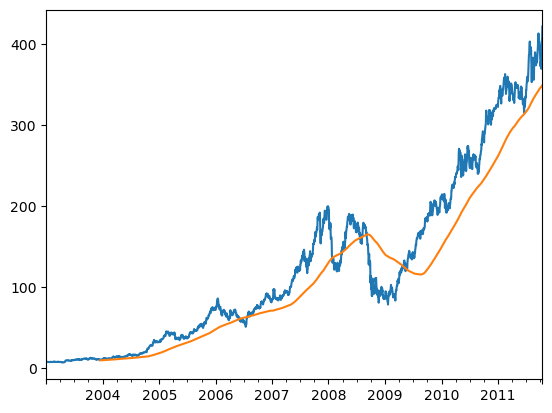

In [127]:
close_px["AAPL"].plot()
close_px["AAPL"].rolling(250).mean().plot()

rolling 함수는 기본적으로 해당 창 내에는 결측치가 없기를 기대하지만 시계열의 시작 지점에서는 필연적으로 window보다 적은 기간의 데이터를 가진다.

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
Freq: B, Name: AAPL, dtype: float64

<Axes: >

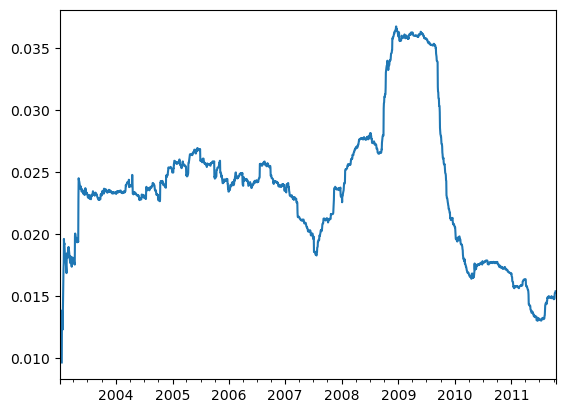

In [131]:
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()
std250[5:12]
std250.plot()

확장창 평균을 구하려면 rolling 대신 expanding을 사용한다.

확장창 평균은 시계열의 시작 지점에서부터 창의 크기가 시계열의 전체 크기가 될 때까지 점점 창의 크기를 늘린다.

In [133]:
expanding_mean = std250.expanding().mean()

<Axes: >

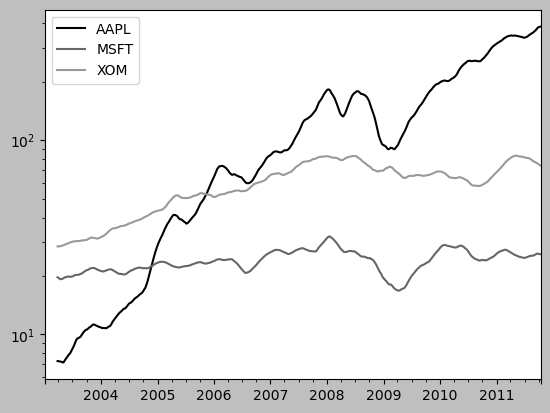

In [135]:
import matplotlib.pyplot as plt

plt.style.use("grayscale")
close_px.rolling(60).mean().plot(logy=True)

In [136]:
dic_var = {"A": [0, 1, 2, 3, 4, 5], "B": [6, 7, 8, 9, 10, 11]}
data = pd.DataFrame(dic_var)
result = data.rolling(3)

data
result.min()
result.sum()

,A,B
0,0,6
1,1,7
2,2,8
3,3,9
4,4,10
5,5,11


,A,B
0,NaN,NaN
1,NaN,NaN
2,0.0,6.0
3,1.0,7.0
4,2.0,8.0
5,3.0,9.0


,A,B
0,NaN,NaN
1,NaN,NaN
2,3.0,21.0
3,6.0,24.0
4,9.0,27.0
5,12.0,30.0


In [138]:
data = {"date": ["2021-01-01", "2021-01-02", "2021-01-03", "2021-01-04", "2021-01-05"],
        "value": [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)
df 

df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

df["rolling_mean"] = df["value"].rolling(window=3).mean()

df

,date,value
0,2021-01-01,10
1,2021-01-02,20
2,2021-01-03,30
3,2021-01-04,40
4,2021-01-05,50


,value,rolling_mean
date,,
2021-01-01,10,NaN
2021-01-02,20,NaN
2021-01-03,30,20.0
2021-01-04,40,30.0
2021-01-05,50,40.0
